In [3]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
file_path = 'combined_result.csv'
df = pd.read_csv(file_path)

# 데이터 확인
df.head()

# 종속 변수와 독립 변수 설정
X = df[['Group', 'LSTM', 'conv', 'augmented', 'frame']]
Y = df['accuracy']

# 회귀 분석 모델 적합
model = sm.OLS(Y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())
print('==============================================================================')


                                 OLS Regression Results                                
Dep. Variable:               accuracy   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              570.6
Date:                Sat, 08 Jun 2024   Prob (F-statistic):                   1.72e-145
Time:                        02:17:22   Log-Likelihood:                         -39.941
No. Observations:                 288   AIC:                                      89.88
Df Residuals:                     283   BIC:                                      108.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [4]:
# 기본 통계 요약
summary_stats = df.describe()
print(summary_stats)
print('==============================================================================')

           Group       LSTM        conv  augmented       frame    accuracy
count  288.00000  288.00000  288.000000  288.00000  288.000000  288.000000
mean     0.50000    0.50000    3.500000    0.50000    6.000000    0.924949
std      0.50087    0.50087    1.710798    0.50087    3.421596    0.026214
min      0.00000    0.00000    1.000000    0.00000    1.000000    0.766816
25%      0.00000    0.00000    2.000000    0.00000    3.000000    0.916295
50%      0.50000    0.50000    3.500000    0.50000    6.000000    0.929609
75%      1.00000    1.00000    5.000000    1.00000    9.000000    0.942094
max      1.00000    1.00000    6.000000    1.00000   11.000000    0.956667


In [5]:
# 상관 계수 행렬
correlation_matrix = df.corr()
print(correlation_matrix)
print('==============================================================================')

                  Group          LSTM          conv     augmented  \
Group      1.000000e+00  3.854941e-17 -5.913923e-17  5.396917e-18   
LSTM       3.854941e-17  1.000000e+00  1.444622e-17  3.777842e-17   
conv      -5.913923e-17  1.444622e-17  1.000000e+00  4.965889e-18   
augmented  5.396917e-18  3.777842e-17  4.965889e-18  1.000000e+00   
frame      1.236958e-16  1.805778e-17 -1.913813e-16 -1.480738e-16   
accuracy  -7.757747e-02 -7.614803e-02  1.383894e-02  3.547049e-02   

                  frame  accuracy  
Group      1.236958e-16 -0.077577  
LSTM       1.805778e-17 -0.076148  
conv      -1.913813e-16  0.013839  
augmented -1.480738e-16  0.035470  
frame      1.000000e+00 -0.052751  
accuracy  -5.275072e-02  1.000000  


Group별 accuracy 평균
Group
0    0.926979
1    0.922919
Name: accuracy, dtype: float64


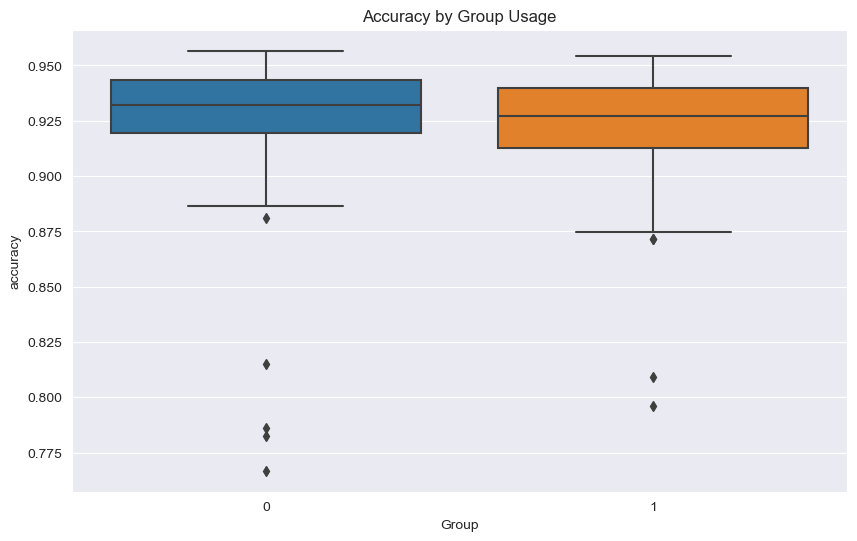

In [6]:
# Group에 따른 accuracy 평균 계산
group_Group = df.groupby('Group')['accuracy'].mean()
print("Group별 accuracy 평균")
print(group_Group)
print('==============================================================================')
# Boxplot으로 accuracy 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='accuracy', data=df)
plt.title('Accuracy by Group Usage')
plt.show()

LSTM별 accuracy 평균
LSTM
0    0.926942
1    0.922956
Name: accuracy, dtype: float64


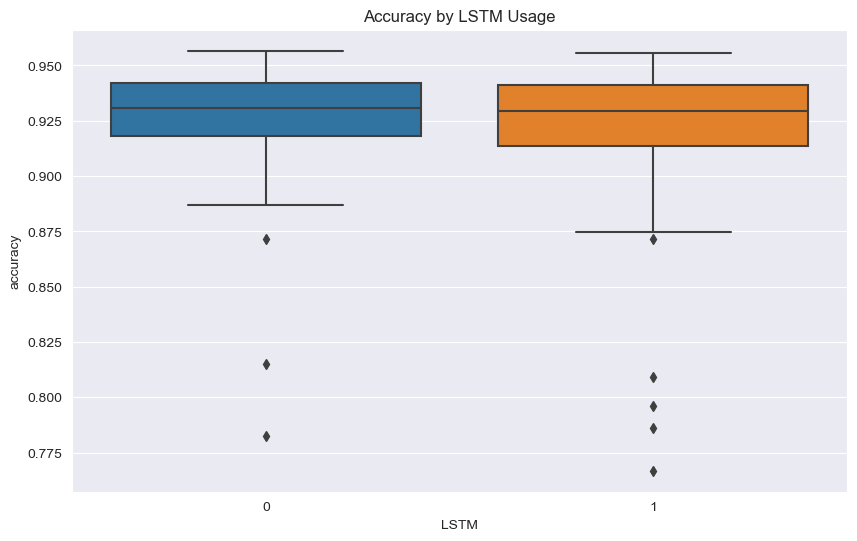

In [7]:
# LSTM에 따른 accuracy 평균 계산
LSTM_Group = df.groupby('LSTM')['accuracy'].mean()
print("LSTM별 accuracy 평균")
print(LSTM_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='LSTM', y='accuracy', data=df)
plt.title('Accuracy by LSTM Usage')
plt.show()

augmented별 accuracy 평균
augmented
0    0.924021
1    0.925877
Name: accuracy, dtype: float64


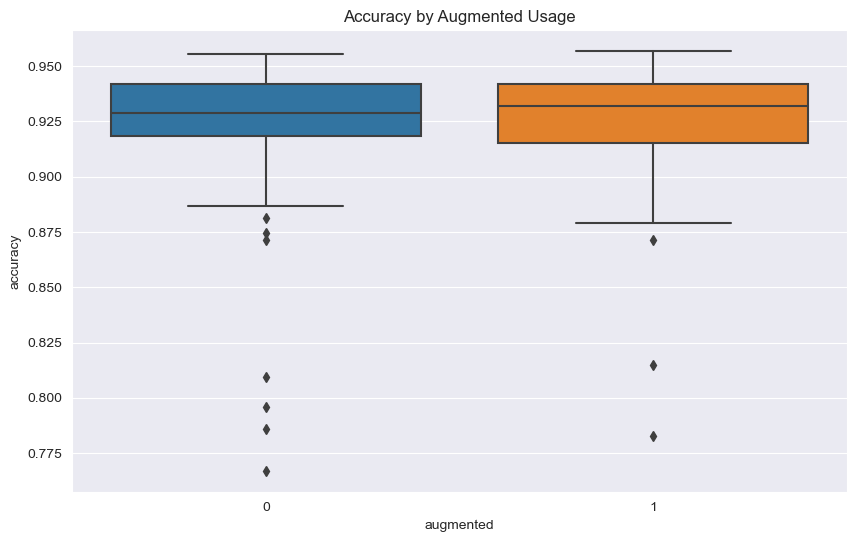

In [8]:
# augmented에 따른 accuracy 평균 계산
augmented_Group = df.groupby('augmented')['accuracy'].mean()
print("augmented별 accuracy 평균")
print(augmented_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='augmented', y='accuracy', data=df)
plt.title('Accuracy by Augmented Usage')
plt.show()

conv별 accuracy 평균
conv
1    0.926470
2    0.926091
3    0.922184
4    0.919652
5    0.927958
6    0.927340
Name: accuracy, dtype: float64


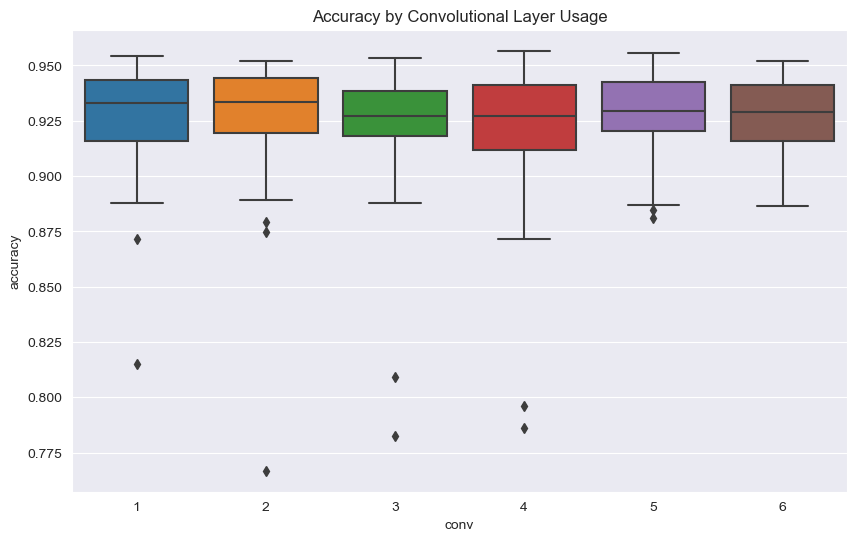

In [9]:
# conv에 따른 accuracy 평균 계산
conv_Group = df.groupby('conv')['accuracy'].mean()
print("conv별 accuracy 평균")
print(conv_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='conv', y='accuracy', data=df)
plt.title('Accuracy by Convolutional Layer Usage')
plt.show()

frame별 accuracy 평균
frame
1     0.902601
3     0.942500
5     0.942302
7     0.928478
9     0.921514
11    0.912299
Name: accuracy, dtype: float64


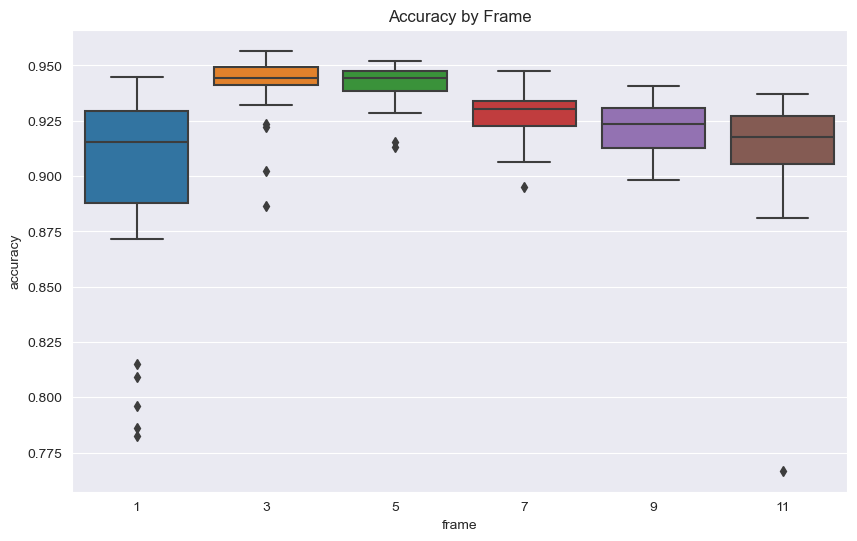

In [10]:
# frame에 따른 accuracy 평균 계산
frame_Group = df.groupby('frame')['accuracy'].mean()
print("frame별 accuracy 평균")
print(frame_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='frame', y='accuracy', data=df)
plt.title('Accuracy by Frame')
plt.show()